# Set up

Prior to Python, I had only used R, so I was surprised to learn that you need to import libraries for routine tasks like handling a dataframe, doing vectorized math, and data visualization. This is what we are doing below.

In [1]:
# Standard data science libraries
# Used for dataframes
import pandas as pd
# Used for doing math
import numpy as np
# Used for visualization
import matplotlib.pyplot as plt

# Making the plot show within our notebook
%matplotlib inline

# Allowing us to set the plot size
import pylab
pylab.rcParams['figure.figsize'] = (10, 10)

This makes Python read our data table

In [61]:
# The equivalent of R's read.csv()
climate_essay_df = pd.read_csv('/home/jovyan/data/data_noID.csv')

# The equivalent of R's dim() - getting the rows x columns
climate_essay_df.shape

(1793, 104)

# Exploratory Data Analysis

In [62]:
# Getting the unique value counts of the 'treatment 1' column
treatment1_counts = climate_essay_df['trt1'].value_counts()
# Printing it
treatment1_counts

0    1204
1     589
Name: trt1, dtype: int64

In [63]:
# We can assign these unique values counts to a dataframe for a better view
pd.DataFrame(treatment1_counts)

,trt1
0,1204
1,589


In [64]:
# The equivalent of R's dplyr::filter()
# Subsetting the DataFrame to only the treatment 1 value (0 if not treatment 1, 1 if)
subsetted_df = climate_essay_df[climate_essay_df['trt1'] == 1]

# The equivalent of R's dplyr::select()
# Subsetting the DataFrame to only columns of interest
subsetted_df = subsetted_df[['trt1', 'don', 'essay']]

# In pandas, removing rows does not automatically reset the index
# This will do that
# 'drop = True' because otherwise it will add a new index columns
subsetted_df = subsetted_df.reset_index(drop = True)

# Getting rows x columns
subsetted_df.shape

(589, 3)

In [65]:
# The equivalent of R's head()
# Viewing the first 5 rows of our subsetted DataFrame
subsetted_df.head(5)

,trt1,don,essay
0,1,15.0,"Dear Adelyn, \n Today is January 7, 2015. I kn..."
1,1,0.0,To whom it may concern in 2050:\n\nThis is 201...
2,1,19.0,"Dear son,\n This is your mother from 2015 w..."
3,1,15.0,"Dear J-Swag,\n I want you to know how much I l..."
4,1,0.0,"Dear Kailey,\nYou will be reading this in the ..."


In [66]:
# Getting a random row from the DataFrame
random_entry = subsetted_df.sample()

# Viewing that random row
random_entry

,trt1,don,essay
165,1,20.0,"Dear Trinity, \n\nI am sure that you noticed t..."


In [67]:
# Viewing only the essay column value for that DataFrame
random_entry['essay']

165    Dear Trinity, \n\nI am sure that you noticed t...
Name: essay, dtype: object

In [68]:
# Viewing the stored value - opposed to the pandas Series object
random_entry['essay'].values

array([ "Dear Trinity, \n\nI am sure that you noticed the seasons changing, and the seasons getting harsher and harsher as you grew older. This isn't just a coincidence, this is due to climate change. \n\nThe USA is still the leading producer of carbon dioxide, due to the coal burning that we still do. China is in 2nd, but their area is so small that they need oxygen tanks to breathe.\n\nI just hope that they decided to do something about the way that fossil fuels are burned with cars and the industry, otherwise, you might not be able to see cities like New Orleans, as it will be under water. \n\nI hope that you have at least been taught on how to save on the burning of fossil fuels. Everything from riding the bus to work and back, to carpooling to a concert. Every little bit helps.\n\nI hope all is well, when you read this... if you read this.\n\nLove, \n\nChristian"], dtype=object)

In [69]:
# Removing that lone value/essay from the numpy array - after all it's just 1
# Python indexing starts at 0!
random_entry['essay'].values[0]

"Dear Trinity, \n\nI am sure that you noticed the seasons changing, and the seasons getting harsher and harsher as you grew older. This isn't just a coincidence, this is due to climate change. \n\nThe USA is still the leading producer of carbon dioxide, due to the coal burning that we still do. China is in 2nd, but their area is so small that they need oxygen tanks to breathe.\n\nI just hope that they decided to do something about the way that fossil fuels are burned with cars and the industry, otherwise, you might not be able to see cities like New Orleans, as it will be under water. \n\nI hope that you have at least been taught on how to save on the burning of fossil fuels. Everything from riding the bus to work and back, to carpooling to a concert. Every little bit helps.\n\nI hope all is well, when you read this... if you read this.\n\nLove, \n\nChristian"

Let's figure out how many words people wrote for the essays

In [70]:
# FOR LOOP METHOD
# Creating an empty vector to store word counts in
word_counts_list = []

# For-looping over all the rows
for row in range(len(subsetted_df)):
    # Storing the text from each row
    essay = subsetted_df['essay'][row]
    # Splitting the string vector into a list of individual words
    # This splits a larger string, on white space (i.e. " "), into smaller component strings
    words = essay.split()
    # Getting the length of that list
    word_count = len(words)
    # Appending that to our growing list - for each row, it gets +1 longer
    word_counts_list.append(word_count)

In [71]:
# LIST COMPREHENSION METHOD
# For each row, it takes that essay columns value/essay
essays = [(subsetted_df['essay'][row]) for row in range(len(subsetted_df))]
# Splits that essay into a list of individual words - by using white space
words = [essay.split() for essay in essays]
# Gets the length of each of those lists
word_counts_list_alternative = [len(word) for word in words]

In [72]:
# Ensures that they are the same length
word_counts_list == word_counts_list_alternative

True

## Plotting

(array([ 170.,  204.,  119.,   59.,   16.,   10.,    4.,    3.,    3.,    1.]),
 array([  84.,  139.,  194.,  249.,  304.,  359.,  414.,  469.,  524.,
         579.,  634.]),
 <a list of 10 Patch objects>)

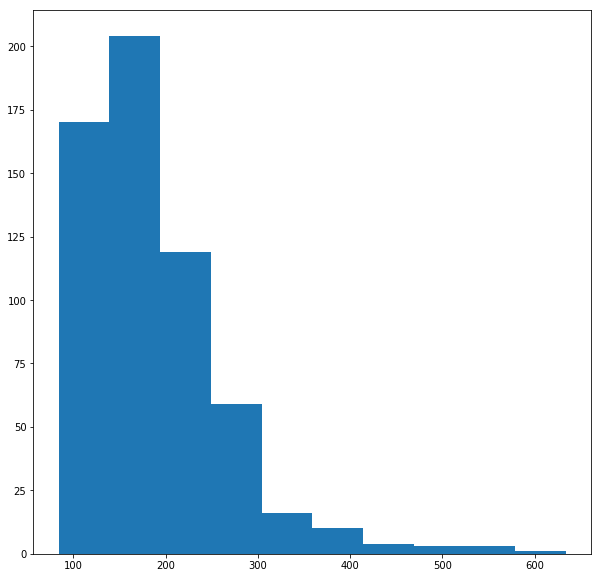

In [73]:
# View the distribution of word counts within essays
plt.hist(word_counts_list)

That's kind of ugly, and what's up with all those arrays and numbers?
<br>Let's clean this up a little bit

The average number of words written is 186.319185


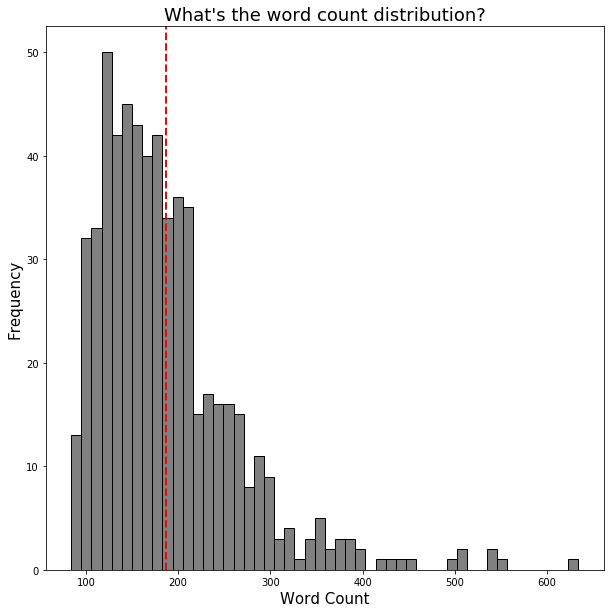

In [74]:
# Getting the average word count
average_word_count = np.mean(word_counts_list)
# Printing this value out in a text statement
# "%0.6f" says that you are formatting a numeric object into the print statement
# The numeric object to-be-inserted follows the "%" after the ending quotation mark
print('The average number of words written is %0.6f' % average_word_count)

# Plotting the histogram
plt.hist(word_counts_list,
         bins = 50,                         # With 50 bins...
         color = 'grey',                    # And grey bars...
         edgecolor = 'black')               # With black edge lines

# Adding labels of specified sizes
plt.xlabel('Word Count',                    # The text for the xlabel
           fontsize = 15)                   # The text's font size
plt.ylabel('Frequency',
           fontsize = 15)
plt.title("What's the word count distribution?",
          fontsize = 18)

# Plot a line for the average value
plt.axvline(x = average_word_count,         # Specifying only the x position makes
                                            #     this a verticle line at average_word_count
            lw = 2,                         # Make this line thicker...
            color = 'red',                  # Make the thicker line red...
            linestyle = '--');              # Make the thicker red line dashed...

<br><br>

What about the donations that people chose to give?

(array([ 168.,   31.,  101.,    4.,    0.,  167.,    5.,   34.,    4.,   75.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 10 Patch objects>)

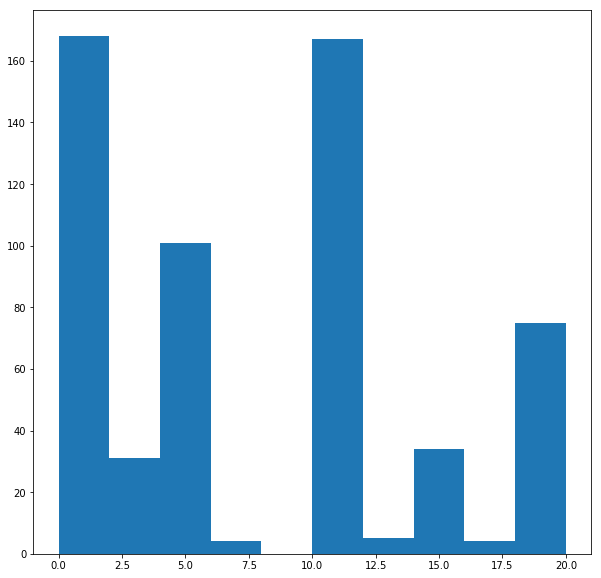

In [75]:
plt.hist(subsetted_df['don'])

The average number of words written is 7.522920


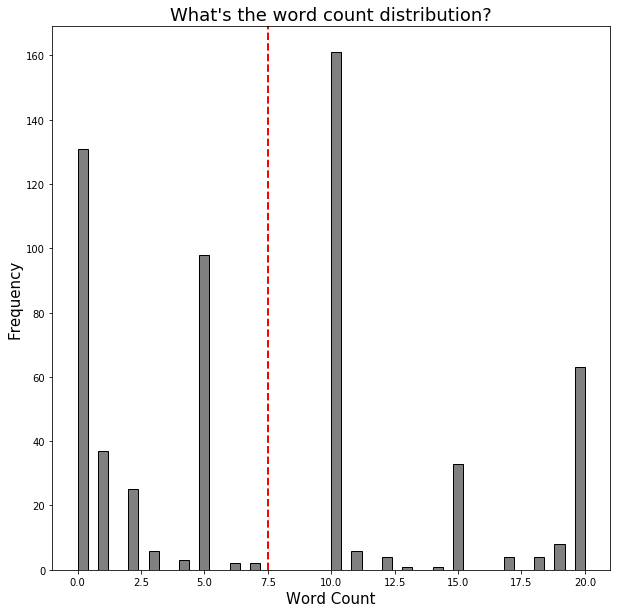

In [76]:
# Calculating the average donation
average_donation = np.mean(subsetted_df['don'])
# The statement printing the average donation
print('The average number of words written is %0.6f' % average_donation)

# The histogram
plt.hist(subsetted_df['don'],
         bins = 50,
         color = 'grey',
         edgecolor = 'black')

# The labels
plt.xlabel('Word Count',
           fontsize = 15)
plt.ylabel('Frequency',
           fontsize = 15)
plt.title("What's the word count distribution?",
          fontsize = 18)

# The average-donation line
plt.axvline(x = average_donation,
            lw = 2,
            color = 'red',
            linestyle = '--');

It would seem that there are two groups within this distribution, $(1)$ those that were strongly convinced and gave $10$ or more dollars of their gift towards climate change donations, and $(2)$ those that were not.

In [77]:
# Creating a logical column - True if the person donated $10 or more
subsetted_df['big_donator'] = (subsetted_df['don'] >= 10)

# Converting this logical to an integer; True = 1, False = 0
subsetted_df['big_donator'] = subsetted_df['big_donator'].astype(int)

# Viewing the first 5 rows
subsetted_df.head(5)

,trt1,don,essay,big_donator
0,1,15.0,"Dear Adelyn, \n Today is January 7, 2015. I kn...",1
1,1,0.0,To whom it may concern in 2050:\n\nThis is 201...,0
2,1,19.0,"Dear son,\n This is your mother from 2015 w...",1
3,1,15.0,"Dear J-Swag,\n I want you to know how much I l...",1
4,1,0.0,"Dear Kailey,\nYou will be reading this in the ...",0


What's the distribution here?

In [78]:
# Viewing the unique value counts again
pd.DataFrame(subsetted_df['big_donator'].value_counts())

,big_donator
0,304
1,285


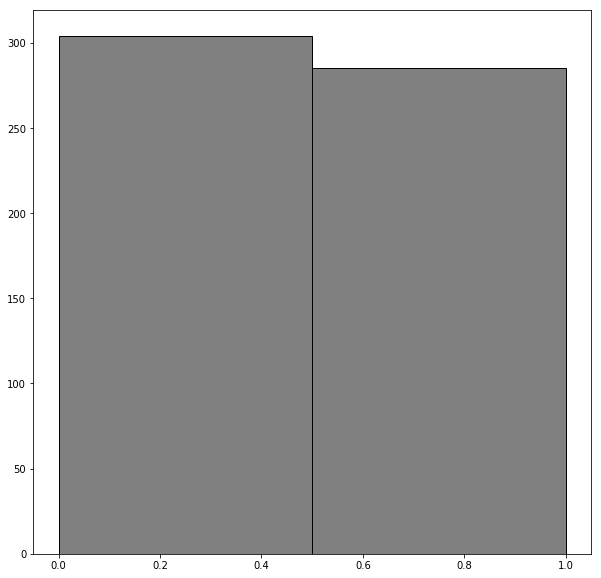

In [79]:
# A histogram of this new 'big donator' column
plt.hist(subsetted_df['big_donator'],
         bins = 2,
         edgecolor = 'black',
         color = 'grey');

# -------RESUME HERE-----------

# Text Processing

Importing the sklearn method for generating a "bag of words"; essentially a large dictionary mapping a word to its counts in a specific observation

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
# Creating a CountVectorizer object
word_counter = CountVectorizer()

# Fitting this word-counter on our train essays
# And transforming the essays into a bag of words dictionary-matrix
bag_of_words = word_counter.fit_transform(essays)

Import the logistic regression model from sklearn

In [82]:
from sklearn.linear_model import LogisticRegression

Setting our target variable

In [83]:
Y_values = subsetted_df['big_donator'].values

Defining and training the model

In [84]:
# Creating the logistic regression object
model = LogisticRegression()

# Fitting it to our "x" and y-values
model.fit(bag_of_words, Y_values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluation

Getting predictions from the model

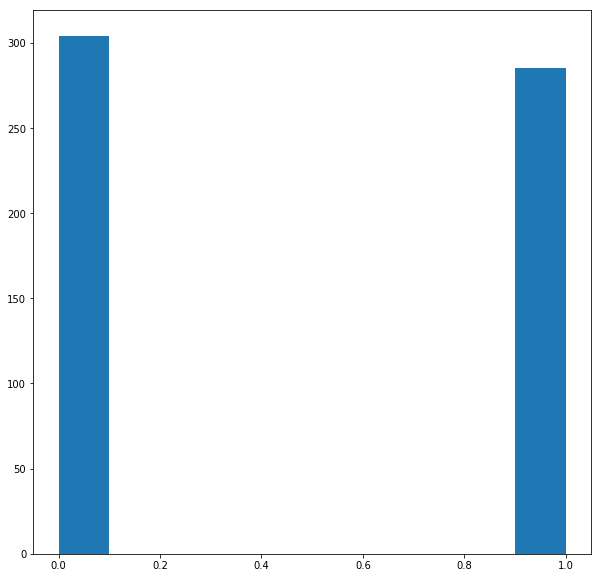

In [85]:
# Generating predictions from the sklearn model
predictions = model.predict(bag_of_words)

plt.hist(predictions);

Import sklearn functions that aid in model evaluation

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [87]:
accuracy = accuracy_score(predictions, Y_values)
print('The accuracy of the model is %0.6f' % (accuracy * 100) + '%')

The accuracy of the model is 100.000000%


If the model was wrong, see where and how it was wrong.
<br>In the confusion matrix, rows sum to the number of observed values for a class, while columns sum
to the number of predicted values for a class. With 100% accuracy, only the diagonal from top-left to bottom-right contains non-zero integers and the non-diagonal values correspond to types of errors

In [88]:
confusion_matrix(Y_values, predictions, labels = [1, 0])

array([[285,   0],
       [  0, 304]])

<br><br>

In [89]:
from sklearn.model_selection import train_test_split

Data split for evaluation

In [90]:
# Creating train (in-sample) and test (out-of-sample) sets
train_df, test_df = train_test_split(subsetted_df, 
                                     test_size = 0.2,       # 80/20 train/test split
                                     random_state = 123)    # Making sure everyone gets the same thing

Some data conversion
<br>The essays are currently in a Panda's DataFrame column, it would be more reasonable to have them as a vector (`np.ndarray`) of strings. This data structure carries less formatting and is more generalizable than a data frame column.

In [91]:
# Converting the Panda's formal dataframe column into a standard vector of strings
train_essays = train_df['essay'].values
test_essays = test_df['essay'].values

train_essays[0]

'Dear Danny,\n     So it is 2015 and I am concerned about you and your brother\'s future. Your father and I see on the news all of the time about how the polar ice caps are melting. We know that if this happens there will be great floods in the coastal cities such as New York. Floods in all major coastal cities would cause millions or even billions of people worldwide to relocate further inland, which could then put a major strain on resources. It will be 2050 by the time you are reading this and I suppose by then some of the extreme consequences of our pollution of the earth will have taken effect. My only prayer is that between now and then, enough people around the world will have changed their ways enough to save our planet.\n    Our family will do its part by driving less, walking more, and recycling. Right now our habits in these areas have a lot of room to improve. Your brothers and father most certainly do not consider what they are throwing away and whether or not it could be 

Let's get a count of words

In [92]:
# Creating a CountVectorizer object
word_counter = CountVectorizer()

# Fitting this word-counter on our train essays
word_counter.fit(train_essays)

# Transforming the train and test set essays into the word count form
test_word_counts = word_counter.transform(test_essays)
train_word_counts = word_counter.transform(train_essays)

# What's the result?
train_word_counts

<471x5394 sparse matrix of type '<class 'numpy.int64'>'
	with 52240 stored elements in Compressed Sparse Row format>

What in the world is that?
<br>Because most words won't be present in any given paragraph, the resulting word counts are mostly zeros. Since it's mostly empty, it's nice to prevent printing out 1000s of zeros, so it is stored as a sparse matrix. We can try to inspect it, but, in reality, it's too much, as shown below.

In [93]:
train_word_counts.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Well, how can we trust this?
<br>We can inspect the attributes that this `word_counter` has learned

In [94]:
learned_words = word_counter.get_feature_names()

print(learned_words[0:10])
print(learned_words[1000:1010])
print(learned_words[-10:])
print("\nIn total, it learned %0.6f words" % len(word_counter.get_feature_names()))

['000', '01', '02', '10', '100', '10000x', '11', '12', '120', '12x6x']
['concerned', 'concerning', 'concerns', 'concert', 'conclusion', 'conclusively', 'concrete', 'condition', 'conditioned', 'conditioner']
['youth', 'yrs', 'yyyyyyyyyyy', 'zabiah', 'zach', 'zayna', 'zero', 'ziplock', 'zoo', 'zzzzzzzzzzz']

In total, it learned 5394.000000 words


What are the individual word counts?

In [95]:
word_counter.vocabulary_

{'dear': 1234,
 'danny': 1212,
 'so': 4438,
 'it': 2654,
 'is': 2642,
 '2015': 41,
 'and': 312,
 'am': 291,
 'concerned': 1000,
 'about': 102,
 'you': 5376,
 'your': 5380,
 'brother': 655,
 'future': 2057,
 'father': 1859,
 'see': 4270,
 'on': 3358,
 'the': 4780,
 'news': 3256,
 'all': 262,
 'of': 3340,
 'time': 4843,
 'how': 2396,
 'polar': 3624,
 'ice': 2435,
 'caps': 738,
 'are': 364,
 'melting': 3048,
 'we': 5221,
 'know': 2741,
 'that': 4778,
 'if': 2447,
 'this': 4805,
 'happens': 2248,
 'there': 4790,
 'will': 5281,
 'be': 487,
 'great': 2176,
 'floods': 1940,
 'in': 2494,
 'coastal': 919,
 'cities': 867,
 'such': 4626,
 'as': 383,
 'new': 3253,
 'york': 5375,
 'major': 2970,
 'would': 5343,
 'cause': 780,
 'millions': 3099,
 'or': 3387,
 'even': 1705,
 'billions': 563,
 'people': 3522,
 'worldwide': 5330,
 'to': 4853,
 'relocate': 4022,
 'further': 2052,
 'inland': 2563,
 'which': 5265,
 'could': 1122,
 'then': 4787,
 'put': 3842,
 'strain': 4576,
 'resources': 4083,
 '2050': 4

# Logistic Regression Model

Importing some sklearn functions that are important to fitting a model

In [96]:
from sklearn.model_selection import GridSearchCV

Getting the target variables in a less-formated structure

In [97]:
test_Y = test_df['big_donator'].values
train_Y = train_df['big_donator'].values

Fitting a logistic regression model based on 5-fold cross validation grid search with several regularization options

In [98]:
classifier = LogisticRegression(random_state = 123)
regularization_options = [{'C': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}]
gs_classifier = GridSearchCV(classifier, regularization_options, cv = 5)

gs_classifier.fit(X = train_word_counts, y = train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

# Model Evaluation

### Train set - In sample

Determining the training set accuracy

In [99]:
train_predictions = gs_classifier.predict(X = train_word_counts)

accuracy_score(train_predictions, train_Y)

1.0

Viewing the confusion matrix

In [100]:
confusion_matrix(train_predictions, train_Y)

array([[249,   0],
       [  0, 222]])

### Test set - Out of sample

In [101]:
test_predictions = gs_classifier.predict(X = test_word_counts)

accuracy_score(test_predictions, test_Y)

0.56779661016949157

In [102]:
confusion_matrix(test_predictions, test_Y)

array([[35, 31],
       [20, 32]])

# Other Ways to Quantify Text

## 1. Inverse frequency counting

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
inverse_freq_counter = TfidfVectorizer(ngram_range = (1, 1))

sentence_array = np.array(['I work in CIRES', 'I work at Earth Lab', 'Work is work'])

inverse_freq_counter.fit(sentence_array)
inverse_freq_counter.get_feature_names()

['at', 'cires', 'earth', 'in', 'is', 'lab', 'work']

In [105]:
tf_idf_weightings = inverse_freq_counter.transform(sentence_array)
tf_idf_weightings.todense()

matrix([[ 0.        ,  0.65249088,  0.        ,  0.65249088,  0.        ,
          0.        ,  0.38537163],
        [ 0.54645401,  0.        ,  0.54645401,  0.        ,  0.        ,
          0.54645401,  0.32274454],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.64612892,
          0.        ,  0.76322829]])

In [106]:
word_counter_proof = CountVectorizer(ngram_range = (1, 1))

word_counter_proof.fit(sentence_array)

word_count_values = word_counter_proof.transform(sentence_array)
word_count_values.todense()

matrix([[0, 1, 0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 2]])

## 2. Word Embeddings/Vectors

In [107]:
import gensim
import nltk

In [108]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [109]:
tokens_x = [nltk.word_tokenize(sent) for sent in train_essays]
len(tokens_x)

471

In [110]:
tokens_x[1][0:10]

['Hello',
 'Dolly',
 '.',
 'I',
 'hope',
 'the',
 'future',
 'has',
 'been',
 'treating']

In [111]:
model = gensim.models.Word2Vec(tokens_x, size = 5, window = 5)

In [112]:
test_sentence = 'This is a test sentence, what happens to it?'

tokens_example = nltk.word_tokenize(test_sentence)
tokens_example

['This',
 'is',
 'a',
 'test',
 'sentence',
 ',',
 'what',
 'happens',
 'to',
 'it',
 '?']

In [113]:
for word in tokens_example:
    print(model[word])

[-1.71323812  0.53061801  0.35467434 -2.02031565  0.74786174]
[-2.15003467 -0.3205933   0.51821518 -2.54047561  0.69790173]
[-2.08088899  0.53198677  0.80539519 -2.37947011  0.53642446]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


KeyError: "word 'test' not in vocabulary"

In [114]:
for word in tokens_example:
    try:
        print(model[word])
    except KeyError as e:
        print(e)

[-1.71323812  0.53061801  0.35467434 -2.02031565  0.74786174]
[-2.15003467 -0.3205933   0.51821518 -2.54047561  0.69790173]
[-2.08088899  0.53198677  0.80539519 -2.37947011  0.53642446]
"word 'test' not in vocabulary"
"word 'sentence' not in vocabulary"
[-1.66893995  0.91080183  0.34226811 -2.53907323  1.15460885]
[-1.40900898  0.26911604  0.37314191 -2.83838964  0.08757287]
[-0.21621497  0.01336697 -0.01118644 -0.40681791  0.1235566 ]
[-2.60906076  0.67483979  0.32518929 -2.05126715 -0.07641125]
[-1.52101433  0.16253334  0.40465525 -2.84217477  0.50854534]
[-2.1003027   0.44161099  0.58049941 -2.88549423  0.69370586]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


## 3. Sentence Embeddings/Vectors

In [135]:
%cd
!git clone https://github.com/openai/generating-reviews-discovering-sentiment.git


%cd generating-reviews-discovering-sentiment/
!pip install tensorflow
!pip install tensorflow-hub
!pip install tqdm

from encoder import Model
model = Model()

%cd
%cd ML_Workshop_Series

/home/jovyan
fatal: destination path 'generating-reviews-discovering-sentiment' already exists and is not an empty directory.
/home/jovyan/generating-reviews-discovering-sentiment
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 51kB 3.7MB/s ta 0:00:011
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Instructions for updating:
dim is deprecated, use axis instead
/home/jovyan
/home/jovyan/ML_Workshop_Series


In [136]:
Obama_tweet = "This week—50 years since Dr. Martin Luther King, Jr. was killed—@BarackObama and @RepJohnLewis sat down with a group of young men for an @MBK_Alliance roundtable to talk about Dr. King's legacy and the courage it takes to stand up for what you believe in: http://go.obama.org/mlk50 "
Trump_tweet = "Much of the bad blood with Russia is caused by the Fake & Corrupt Russia Investigation, headed up by the all Democrat loyalists, or people that worked for Obama. Mueller is most conflicted of all (except Rosenstein who signed FISA & Comey letter). No Collusion, so they go crazy!"

In [137]:
Obama_vector = model.transform([Obama_tweet])
Trump_vector = model.transform([Trump_tweet])

6.543 seconds to transform 1 examples
6.182 seconds to transform 1 examples


In [138]:
Obama_vector.shape

(1, 4096)

In [139]:
comparison_tweet = "Why would Kim Jong-un insult me by calling me old, when I would NEVER call him short and fat? Oh well, I try so hard to be his friend - and maybe someday that will happen!"
comparison_vector = model.transform([comparison_tweet])

3.692 seconds to transform 1 examples


In [140]:
print(np.square(np.sum(comparison_vector - Obama_vector)))
print(np.square(np.sum(comparison_vector - Trump_vector)))

18.7616
1.57058


## 4. Latent Dirichlet Allocation

In [141]:
from gensim import corpora

import string

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

In [142]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def cleaning(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    two = "".join(i for i in one if i not in punctuation)
    three = " ".join(lemmatize.lemmatize(i) for i in two.split())
    return three

In [144]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [145]:
only_essays = pd.DataFrame(subsetted_df['essay'])
text = only_essays.applymap(cleaning)['essay']
text_list = [i.split() for i in text]
len(text_list)

589

In [146]:
dictionary = corpora.Dictionary(text_list)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(5668 unique tokens: ['2015', '37', '7', 'ability', 'adelyn']...)


In [147]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

In [ ]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

In [ ]:
ldamodel.print_topics(5)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Some less structured stuff I also explored but ultimately didn't incorporate

## Predicting donations

In [103]:
train_df, test_df = train_test_split(subsetted_df, test_size = 0.2)

train_Y = train_df['don'].values
test_Y = test_df['don'].values

train_essays = train_df['essay'].values
test_essays = test_df['essay'].values

word_counter = CountVectorizer()
word_counter.fit(train_essays)

train_word_counts = word_counter.transform(train_essays)
test_word_counts = word_counter.transform(test_essays)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
regressor = LinearRegression()
regressor.fit(X = train_word_counts, y = train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

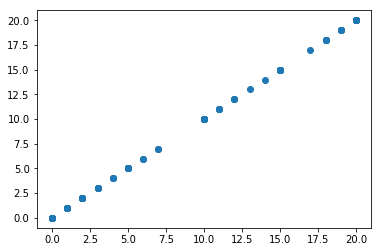

In [106]:
train_predictions = regressor.predict(train_word_counts)
plt.scatter(train_predictions, train_Y)

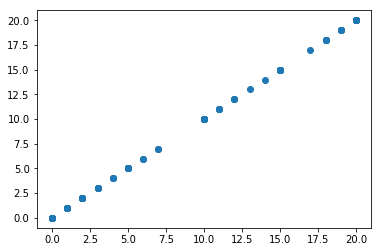

In [107]:
plt.scatter(train_predictions, train_Y)

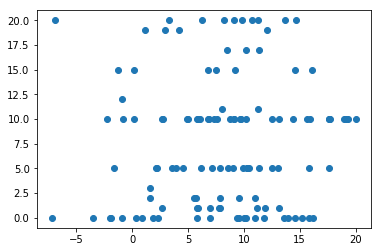

In [108]:
test_predictions = regressor.predict(test_word_counts)
plt.scatter(test_predictions, test_Y)

<br><br><br>

In [109]:
from sklearn.linear_model import Ridge

In [110]:
regressor = Ridge()
regularization_options = [{'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}]
gs_regressor = GridSearchCV(regressor, regularization_options, cv = 5)

gs_regressor.fit(X = train_word_counts, y = train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

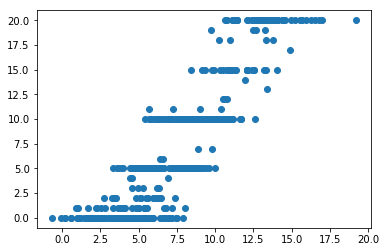

In [111]:
train_predictions = gs_regressor.predict(train_word_counts)
plt.scatter(train_predictions, train_Y)

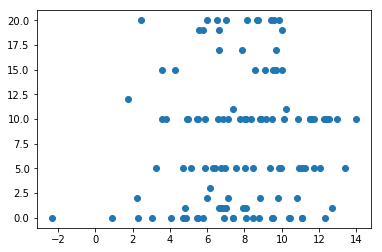

In [112]:
test_predictions = gs_regressor.predict(test_word_counts)
plt.scatter(test_predictions, test_Y)